# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Location
from shapely.geometry import Point
from geopandas import GeoDataFrame
import geopandas as gpd

import my_pickle as mp

import warnings
warnings.filterwarnings('ignore')

# Read in data

In [42]:
user_df = mp.unjson_it('data_user')
# convo_df = mp.unjson_it('data_convo')
# message_df = mp.unjson_it('data_message') 
# master_df = mp.unjson_it('data_master')

print("Make sure we're not using ECT data")
print(convo_df.timestamp.max())

Make sure we're not using ECT data
2017-10-02 01:35:58.644000


In [45]:
user_df.created = pd.to_datetime(user_df.created*1000000)
user_df.updated = pd.to_datetime(user_df.updated*1000000)

In [ ]:
# message_df['const'] = 1
# temp_df = message_df.groupby('conversation_id').count().const.head(5)
# temp_df

In [ ]:
# convo_df.set_index('conv_id')
# temp2 = convo_df.join(temp_df)
# temp2.head()

In [ ]:
# master_df.head(2)

In [ ]:
# for id, row in user_df.iterrows():
#     print(row.about)

In [ ]:
# user_df.columns

In [ ]:
# user_df = mp.unjson_it('data_user')
# user_df.columns

# COST RANGE

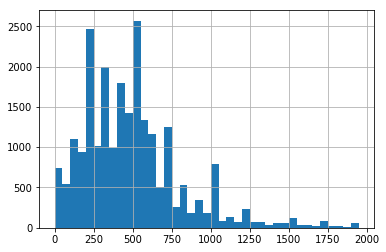

In [3]:
user_df['cost_range'] = user_df.maxCost-user_df.minCost
user_df.cost_range.hist(bins=range(0,2000,50))
plt.show()

# NUM ROOMMATES

(0, 11)

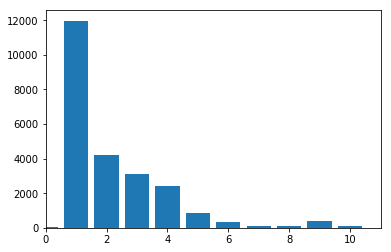

In [4]:
x = user_df.groupby('numRoommates').created.count().index
y = user_df.groupby('numRoommates').created.count().values
plt.bar(x, y)
plt.xlim(0,11)

# CONVERSATIONS

### basic info

In [5]:
print("There are {} conversation.".format(len(convo_df)))

There are 10937 conversation.


In [6]:
response_rate = convo_df.response.sum()/len(convo_df)
print("Messages get responses {:.2} of the time.".format(response_rate))

Messages get responses 0.11 of the time.


# USERS

### CREATED

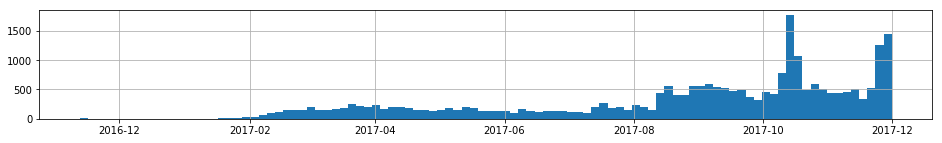

In [38]:
user_df.created.hist(figsize=(16,2), bins=100);

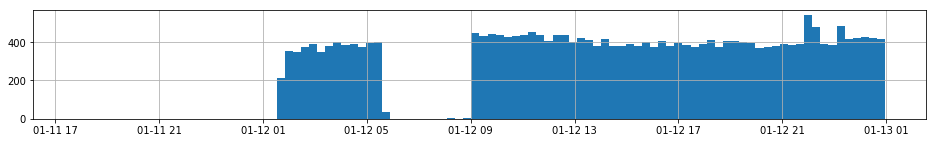

In [39]:
user_df.updated.hist(figsize=(16,2), bins=100);

### TIME FROM CREATED TO UPDATED

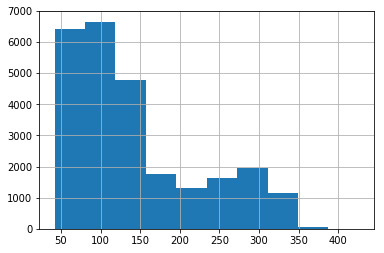

In [35]:
user_df["update-created"] = user_df.updated-user_df.created
# user_df["update-created"] = user_df["update-created"].apply(lambda x: pd.to_datetime(x*100000000))
user_df["update-created"] = user_df["update-created"].apply(lambda x: x.days)
user_df["update-created"].hist()

### ABOUT

#### length

In [ ]:
user_df.len_about.hist(bins=range(1, 1000, 10), figsize = [10, 3])
plt.title("Lenght of 'about' Section")
plt.tight_layout()

#### percent responding

In [ ]:
wth = user_df[user_df.len_about > 0].count()['about']
wthout = user_df[user_df.len_about == 0].count()['about']
print('total number of user entries: {}'.format(wth+wthout))
print('number with about sections: {}'.format(wth))
print('number without about sections: {}'.format(wthout))
print('percent with about sections: {}'.format(wth/(wth+wthout)))

In [49]:
user_df[user_df.len_about>0].about.values

array(["I'm really busy with work ",
       'Integrative Medicine practitioner. Pain Management Specialist. \nWriter. Explorer. Health enthusiast. Reads Philosophy and savours good Design. \nEnjoys intelligent conversations and company of open minded folks. In for an experience lets make it worth while.\nGot lots to teach and lots to learn!',
       "I'm a 41 year old Entrepreneur and a Socialite. I'm attend school at night time as a Communications major at Laney College. I work Full time at Bay Area Fastrak as a Customer Support Rep in San Francisco CA. I'm down to earth person that loves life. I'm also working from home building my Social Media brand and as a Talent Recruiter for two companies that are are in the works right now seeking artist pop and commercial artist that are seeking Publishing. This is new joint venture that I'm working on between my business partner that is Grammy nominated Songwriter/ Film Composer. I have been in Entertainment for 20 years and I have a great Ma

### BIRTHDAY

In [ ]:
user_df.age.hist(bins=range(16,100), figsize=(16,2));

### LOCATION

In [ ]:
user_df.location[0][0]

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [ ]:
user_df.location = user_df.location.apply(lambda x: x if isinstance(x, list) else [0,0])

In [ ]:
geometry = [Point(xy) for xy in user_df.location]
loc_df = user_df.location
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(loc_df, crs=crs, geometry=geometry)


# geometry = [Point(xy) for xy in zip(user_df.longitude, user_df.latitude)]
# loc_df = user_df[['longitude', 'latitude']]
# crs = {'init': 'epsg:4326'}
# gdf = GeoDataFrame(loc_df, crs=crs, geometry=geometry)

In [ ]:
fig, ax = plt.subplots(figsize = (16,10))

ax.set_aspect('equal')

world.plot(ax=ax, color='#66FF66', edgecolor='black')

gdf.plot(ax=ax, marker='o', color='#FF00FF', markersize=5)
ax.set_facecolor("#00FFFF")
plt.show();

''' OPTION TWO
base = world.plot(color='white', edgecolor='black', figsize = (16,10))
gdf.plot(ax=base, marker='o', color='#FF00FF', markersize=5);
''';

In [ ]:
fig, ax = plt.subplots(figsize = (16,10))

ax.set_aspect('equal')
ax.set_xlim([-126, -67])
ax.set_ylim([24, 50])

world.plot(ax=ax, color='#66FF66', edgecolor='black')

gdf.plot(ax=ax, marker='o', color='#FF00FF', markersize=5)
ax.set_facecolor("#00FFFF")
plt.show();

''' OPTION TWO
base = world.plot(color='white', edgecolor='black', figsize = (16,10))
gdf.plot(ax=base, marker='o', color='#FF00FF', markersize=5);
''';

In [ ]:
fig, ax = plt.subplots(figsize = (16,10))

ax.set_aspect('equal')
ax.set_xlim([-122.8, -121.5])
ax.set_ylim([37, 38.2])

world.plot(ax=ax, color='#66FF66', edgecolor='black')

gdf.plot(ax=ax, marker='o', color='#FF00FF', markersize=5)
ax.set_facecolor("#00FFFF")
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize = (16,10))

ax.set_aspect('equal')
ax.set_xlim([-80, -70])
ax.set_ylim([40, 45])

world.plot(ax=ax, color='#66FF66', edgecolor='black')

gdf.plot(ax=ax, marker='o', color='#FF00FF', markersize=5)
ax.set_facecolor("#00FFFF")
plt.show();

In [ ]:
master_df = mp.unjson_it('data_master')
master_df['const'] = 1

In [ ]:
messages_with_responses.groupby('first_uid').const.count().mean()

In [ ]:
messages_without_responses.groupby('first_uid').const.count().mean()

In [ ]:
master_df.groupby('first_uid').const.count().mean()

# CONVERSATION LENGTH

In [ ]:
master_df

# COMPARE RESPONSE RATES

In [52]:
# separate dataset into with and without responses
messages_with_responses = master_df[master_df.response == 1]
messages_without_responses = master_df[master_df.response == 0]

In [53]:
messages_with_responses.columns

Index(['I_count_receiver', 'I_count_sender', 'I_ratio_receiver',
       'I_ratio_sender', 'about_receiver', 'about_sender', 'activeAt_receiver',
       'activeAt_sender', 'age_dif', 'age_receiver',
       ...
       'term_sender', 'timestamp', 'type_receiver', 'type_sender',
       'uid_receiver', 'uid_sender', 'updated_receiver', 'updated_sender',
       'work_receiver', 'work_sender'],
      dtype='object', length=117)

In [59]:
# fn to display plot
def plot_feature(col, bins=None):
    with_resp = messages_with_responses[col].hist(figsize = (16,4), bins = bins, normed=True, alpha = .5)
    without_rest = messages_without_responses[col].hist(figsize = (16,4), bins = bins,normed=True, alpha = .3, color='r')
    
    plt.xlabel(col,fontsize=14)
    plt.ylabel('Number of Messages',fontsize=14)
    plt.legend(['Response',"No Response"])
    plt.show()
    print(col+" with response: {:.9f}".format(messages_with_responses[col].mean()))
    print(col+" without response: {:.9f}\n\n".format(messages_without_responses[col].mean()))

# LENGTH OF ABOUT

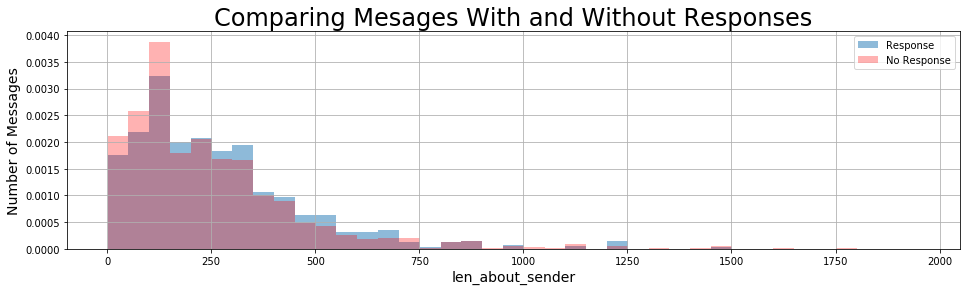

len_about_sender with response: 188.7
len_about_sender without response: 175.4




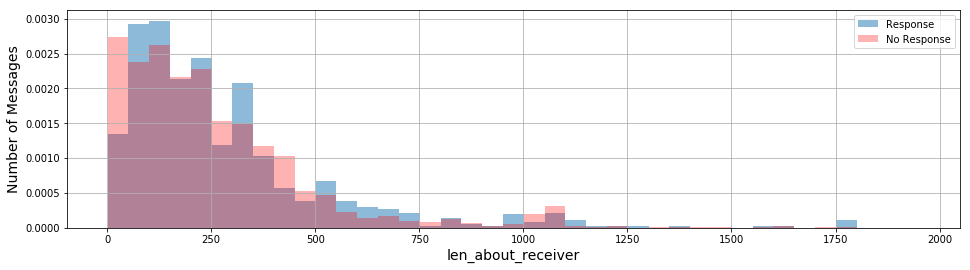

len_about_receiver with response: 195.6
len_about_receiver without response: 113.9




In [55]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('len_about_sender', range(1, 2000, 50))
plot_feature('len_about_receiver', range(1, 2000, 50))

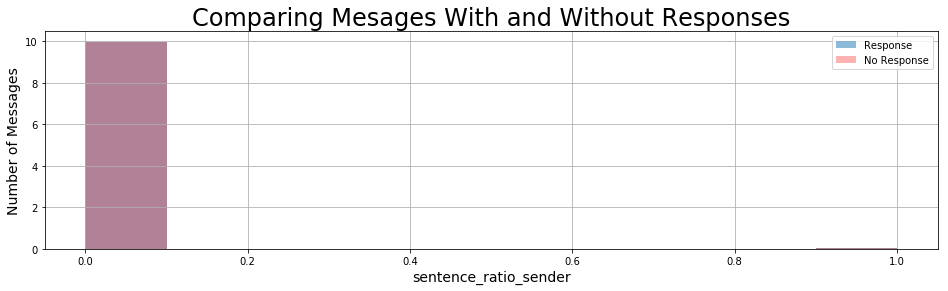

sentence_ratio_sender with response: 0.021229667
sentence_ratio_sender without response: 0.017719450




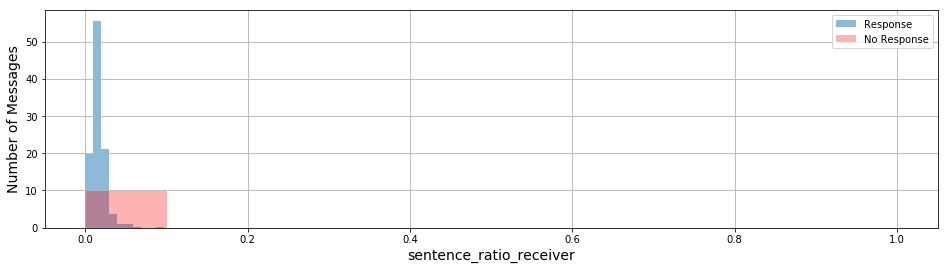

sentence_ratio_receiver with response: 0.015946282
sentence_ratio_receiver without response: 0.016475477




In [60]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('sentence_ratio_sender')
plot_feature('sentence_ratio_receiver')

# AGE OF RESPONDENTS

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('age_sender',range(16,60))
plot_feature('age_receiver',range(16,60))

# MAX COST

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('maxCost_sender')
plot_feature('maxCost_receiver')

# HOBBIES OVERLAP

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('hobbies_overlap')

# AGE DIFFERENCE

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('age_dif', range(40))

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('type_sender',range(0,3))
plot_feature('type_receiver',range(0,3))

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('isStudent_sender',range(0,3))
plot_feature('isStudent_receiver',range(0,3))

# MIN COST

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('minCost_sender',range(0,2000,50))
plot_feature('minCost_receiver',range(0,2000,50))

# LEN OF FIRST MESSAGE

In [ ]:
plt.title('Comparing Mesages With and Without Responses',fontsize=24) 
plot_feature('first_len', range(0,500, 10))